In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
# Side note to self for _xsrf error: https://stackoverflow.com/questions/55014094/jupyter-notebook-not-saving-xsrf-argument-missing-from-post

In [3]:
# Was downloaded on 1/1/2021 from: https://www.kaggle.com/Cornell-University/arxiv
file_path = 'arxiv-metadata-oai-snapshot.json'

In [4]:
# https://github.com/jupyter/help/issues/201
with open('arxiv-metadata-oai-snapshot.json') as f:
    for _ in range(3):
        print(f.readline())

{"id":"0704.0001","submitter":"Pavel Nadolsky","authors":"C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan","title":"Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies","comments":"37 pages, 15 figures; published version","journal-ref":"Phys.Rev.D76:013009,2007","doi":"10.1103/PhysRevD.76.013009","report-no":"ANL-HEP-PR-07-12","categories":"hep-ph","license":null,"abstract":"  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predic

In [5]:
# takes article metadata as a string and returns the arXiv shorthand for categories seperated by a space
def clean_cats(data):
    spl = data.split('"categories":')[1].split(',"license"')[0]
    return spl[1:-1]

In [6]:
# takes article metadata as a string and returns the title (without quotation marks)
def clean_title(data):
    spl = data.split('"title":')[1].split(',"comments":')[0]
    return spl[1:-1].replace('\\n', '')

In [7]:
# takes article metadata as a string and returns abstract (without quotation marks)
def clean_ab(data):
    spl = data.split('"abstract":')[1].split(',"versions":')[0]
    return spl[3:-1].replace('\\n', '')

In [8]:
# takes categories as a string (i.e. as the result of clean_cats) and returns the general category they fall under (by majority)
# currently, a paper with equal tags in more than one subject is "randomly" chosen to be categorized by one of them
# https://arxiv.org/category_taxonomy
def gen_cat(cats):
    math = q_bio = cs = q_fin = stat = eess = econ = physics = 0
    gen_cat_list = ['math', 'q-bio', 'cs', 'q-fin', 'stat', 'eess', 'econ']
    physics_list = ['astro-ph', 'cond-mat', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th', 'math-ph', 'nlin', 'nucl-ex',
                   'nucl-th', 'physics', 'quant-ph']
    cat_list = cats.split(' ')
    for cat in cat_list:
        if cat.split('.')[0] == 'math':
            math+=1
        elif cat.split('.')[0] == 'q-bio':
            q_bio+=1
        elif cat.split('.')[0] == 'cs':
            cs+=1
        elif cat.split('.')[0] == 'q-fin':
            q_fin+=1
        elif cat.split('.')[0] == 'stat':
            stat+=1
        elif cat.split('.')[0] == 'eess':
            eess+=1
        elif cat.split('.')[0] == 'econ':
            econ+=1
        elif cat.split('.')[0] in physics_list:
            physics+=1
    l = [math, q_bio, cs, q_fin, stat, eess, econ, physics]
    gen_cat_list.append('physics')
    return gen_cat_list[l.index(max(l))]

In [9]:
# https://github.com/jupyter/help/issues/201
with open('arxiv-metadata-oai-snapshot.json') as f:
    for _ in range(3):
        l = f.readline()
        print(clean_cats(l))
        print(gen_cat(clean_cats(l)))
        print('')

hep-ph
physics

math.CO cs.CG
math

physics.gen-ph
physics



In [10]:
THRESHOLD = int(5e3)

In [11]:
cat, title, ab = [], [], []

# https://github.com/jupyter/help/issues/201
with open(file_path) as f:
    for _ in range(THRESHOLD):
        t = f.readline()
        title.append(clean_title(t))
        ab.append(clean_ab(t))
        cat.append(gen_cat(clean_cats(t)))

In [12]:
print(cat[:2])
print(title[:2])
print(ab[:2])

['physics', 'math']
['Calculation of prompt diphoton production cross sections at Tevatron and  LHC energies', 'Sparsity-certifying Graph Decompositions']
['A fully differential calculation in perturbative quantum chromodynamics ispresented for the production of massive photon pairs at hadron colliders. Allnext-to-leading order perturbative contributions from quark-antiquark,gluon-(anti)quark, and gluon-gluon subprocesses are included, as well asall-orders resummation of initial-state gluon radiation valid atnext-to-next-to-leading logarithmic accuracy. The region of phase space isspecified in which the calculation is most reliable. Good agreement isdemonstrated with data from the Fermilab Tevatron, and predictions are made formore detailed tests with CDF and DO data. Predictions are shown fordistributions of diphoton pairs produced at the energy of the Large HadronCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgsboson are contrasted with those produced from

In [13]:
df = pd.DataFrame([title, ab, cat])
df = df.transpose()
df.columns = ['Title', 'Abstract', 'Category']

In [14]:
df.head()

,Title,Abstract,Category
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturbati...,physics
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\\ell)$-p...",math
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is describe...,physics
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle n...,math
4,From dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_...,In this paper we show how to compute the $\\La...,math


Note that while the above preview makes it seem as though the characters JSON used for the math formatting are being rendered, but the cell below shows that this is not the case (i.e., the text is still normal text). 

In [15]:
df['Title'][4]

'From dyadic $\\\\Lambda_{\\\\alpha}$ to $\\\\Lambda_{\\\\alpha}$'

In [16]:
lat = '22 $$ 33'
pop = lat.split('$')
pop.remove('')
print(pop)

['22 ', ' 33']


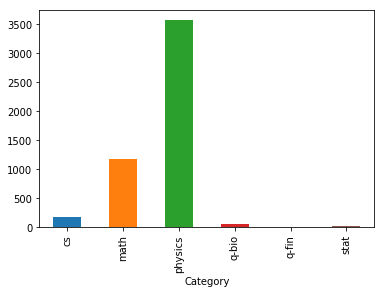

In [17]:
df.groupby('Category').Abstract.count().plot.bar(ylim=0)
plt.show()

Turns out these are the only 6 categories that actually show up in the portion of the dataset that we chose to work with. Oh well. 

In [18]:
# The following makes use of this resource: https://towardsdatascience.com/multi-class-text-classification-with-sklearn-and-nltk-in-python-a-software-engineering-use-case-779d4a28ba5

In [19]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [20]:
stemmer = PorterStemmer()
words = stopwords.words("english")
df['Cleaned Title'] = df['Title'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z0-9]", " ", x).split() if i not in words]).lower())
df['Cleaned Abstract'] = df['Abstract'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z0-9]", " ", x).split() if i not in words]).lower())

In [21]:
df.head()

,Title,Abstract,Category,Cleaned Title,Cleaned Abstract
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturbati...,physics,calcul prompt diphoton product cross section t...,a fulli differenti calcul perturb quantum chro...
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\\ell)$-p...",math,sparsiti certifi graph decomposit,we describ new algorithm k ell pebbl game colo...
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is describe...,physics,the evolut earth moon system base dark matter ...,the evolut earth moon system describ dark matt...
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle n...,math,a determin stirl cycl number count unlabel acy...,we show determin stirl cycl number count unlab...
4,From dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_...,In this paper we show how to compute the $\\La...,math,from dyadic lambda alpha lambda alpha,in paper show comput lambda alpha norm alpha g...


In [22]:
df.iloc[4,:]['Abstract']

'In this paper we show how to compute the $\\\\Lambda_{\\\\alpha}$ norm, $\\\\alpha\\\\ge0$, using the dyadic grid. This result is a consequence of the description ofthe Hardy spaces $H^p(R^N)$ in terms of dyadic and special atoms.'

In [23]:
df.iloc[4,:]['Cleaned Abstract']

'in paper show comput lambda alpha norm alpha ge0 use dyadic grid thi result consequ descript ofth hardi space h p r n term dyadic special atom'

In [24]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", ngram_range=(1, 2))
title_final_features = vectorizer.fit_transform(df['Cleaned Title']).toarray()
title_final_features.shape

(5000, 2907)

In [25]:
# title training and testing sets
X_t = title_final_features
Y_t = df['Category']
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, Y_t, test_size=0.25)

In [26]:
# https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
# RANDOM FOREST
rf_t = RandomForestClassifier(n_estimators=100)
rf_t.fit(X_t_train, y_t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
y_t_pred = rf_t.predict(X_t_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_t_test, y_t_pred))

0.8288


We have an 82.88% accuracy in predicting the category of a paper based on its title. 

In [29]:
abstract_final_features = vectorizer.fit_transform(df['Cleaned Abstract']).toarray()
abstract_final_features.shape

(5000, 17747)

In [30]:
# abstract training and testing sets
X_a = abstract_final_features
Y_a = df['Category']
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, Y_a, test_size=0.25)

In [31]:
# https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/
# RANDOM FOREST
rf_a = RandomForestClassifier(n_estimators=100)
rf_a.fit(X_a_train, y_a_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
y_a_pred = rf_a.predict(X_a_test)

In [33]:
print(accuracy_score(y_a_test, y_a_pred))

0.8736


We have an 87.3% accuracy in predicting the category of a paper based on its abstract. 

In [34]:
ratio_sum = ph_sum = 0
for i in df['Category'].unique():
    print(i, (df['Category'] == i).sum())
    if i != 'physics':
        ratio_sum += (df['Category'] == i).sum()
    else:
        ph_sum = (df['Category'] == i).sum()
print(ph_sum / (ratio_sum + ph_sum))

physics 3565
math 1174
q-bio 64
cs 174
q-fin 7
stat 16
0.713


The ratio of physics to total paper is less than the accuracy (73% < 83% and < 87%). Therefore, the algorithm did better than just guessing "physics" all the time. 